#                           THE SPARKS FOUNDATION
                                         (GRIPNOV20)
Author : BEMBERKAR SHASHANK SAI

    DATASCIENCE AND BUSINESS ANALYTICS
    
    TASK 1: Predict the percentage of an student based on the number of study hours using linear regression

    

In [1]:
# IMPORTING REQUIRED LIBRARIES FOR THE DATASET
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white',color_codes=True)
sns.set(font_scale=1.5)

In [2]:
#IMPORTING DATA
df=pd.read_csv('data.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#EXPLORATORY DATA ANALYSIS
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.isnull().sum() #for null values

Hours     0
Scores    0
dtype: int64

In [10]:
df.isna().any  #for missing values

<bound method DataFrame.any of     Hours  Scores
0   False   False
1   False   False
2   False   False
3   False   False
4   False   False
5   False   False
6   False   False
7   False   False
8   False   False
9   False   False
10  False   False
11  False   False
12  False   False
13  False   False
14  False   False
15  False   False
16  False   False
17  False   False
18  False   False
19  False   False
20  False   False
21  False   False
22  False   False
23  False   False
24  False   False>

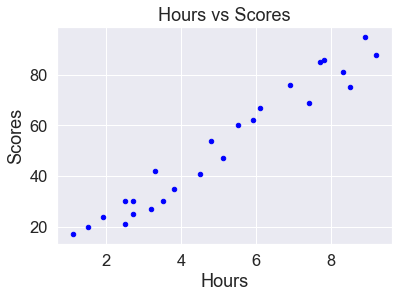

In [11]:
#plotting the distribution 
df.plot.scatter(x='Hours',y='Scores',color='blue')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

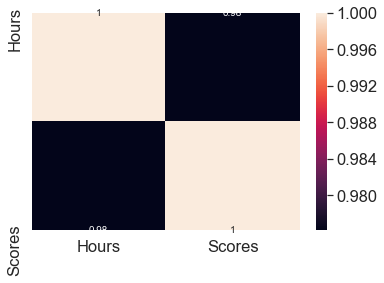

In [12]:
sns.heatmap(df.corr(),annot=True)

In [13]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0.5, 1, 'plotting the regreesion line')

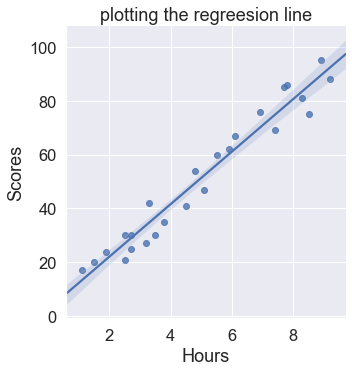

In [14]:
sns.lmplot(x="Hours",y="Scores",data=df)
plt.title('plotting the regreesion line')

In [15]:
#PREPARING THE DATA
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
#TRAINING THE MODEL
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state = 0)
linreg = LinearRegression()
linreg.fit(x,y)
print("done with the training")

done with the training


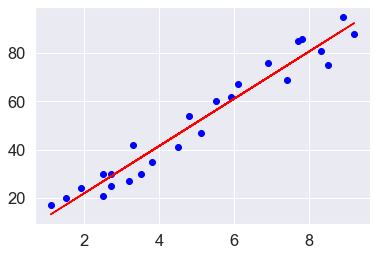

In [18]:
#VISUALIZING THE REGRESSION LINE
line = linreg.coef_*x + linreg.intercept_
plt.scatter(x,y,color ='blue')
plt.plot(x,line,color ='red')
plt.show()

# PREDICTING AND EVALUATING

In [20]:

#PREDICTING TRAINING SAMPLES
Y_pred = linreg.predict(X_train)

print("\nTraining score :")
print("Mean squared error: %.2f"% mean_squared_error(Y_train, Y_pred))
print('R2 score: %2f' % r2_score(Y_train, Y_pred))

#PREDICTING TESTING SAMPLES

Y_pred = linreg.predict(X_test)


print("\nTesting score :")
print("Mean squared error: %.2f"% mean_squared_error(Y_test, Y_pred))
print('R2 score: %2f' % r2_score(Y_test, Y_pred))


Training score :
Mean squared error: 31.68
R2 score: 0.948495

Testing score :
Mean squared error: 22.95
R2 score: 0.956853


In [21]:
#COMPARING ACTUAL VS PREDICTED
df1 = pd.DataFrame({'Actual': Y_test,'predicted': Y_pred})
df1

,Actual,predicted
0,20,17.147378
1,27,33.766244
2,69,74.824618
3,30,26.923182
4,62,60.160913
5,35,39.631726
6,24,21.057700
7,86,78.734940


In [22]:
#TESTING ON OUR OWN DATA
Hours = np.array([[9.25]])
predict=linreg.predict(Hours)
print("No of Hours = {}".format(Hours))
print("predicted score = {}".format(predict[0]))

No of Hours = [[9.25]]
predicted score = 92.9098547701573


# THANKYOU